<a href="https://colab.research.google.com/github/DeepLearningAssignments/DeepLearningIntroduction-Shlezinger/blob/main/Assignment1_Music_Century_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Music Century Classification

**Deadline**: Sunday, April 4th, by 9pm.

**Submission**: Submit a PDF export of the completed notebook as well as the ipynb file. 



In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [3]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

In [4]:
import os
csv_file = 'YearPredictionMSD.txt.zip'
if not os.path.isfile(csv_file):
  !wget {csv_path}
csv_path = csv_file

In [5]:
t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [6]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,...,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.0500

To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [7]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [8]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,...,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34

### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [9]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here

# If a sample from the test set has the same artist as samples from the train set, 
# it'll actually impose a dependancy between the train and test sets.
# For example, if the model will detect a pattern characteristic to a 
# specific artist that was on the training set, predictions should be more accurate.
# But in this case the model will be less accurate on songs from unknown artists, 
# in other words, the model will not generalize well.
# We assume there are some characteristic patterns of each period 
# (e.g. song genre or recording quality).

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [10]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [11]:
# Write your explanation here

# We assume the test distribution will be similar to the distribution of the training data, 
# (otherwise we shouldn't expect the supervised machine learning methodology we employ to be successful).
# In practice, the test distribution will be different to some extent, 
# or not large enough to estimate the means and stds good enough. 
# The actual normalization impact the training, so we want to use the same normalization,
# so that the data is as close as possible to the training distribution.

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [12]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# Write your explanation here

# We want to test the model on the test set just once, to be able to estimate the generalization error correctly.
# When we use the validation set and make decisions based on the validation set, it actually becomes 
# another training set.
# For example, if we decide when to stop training based on the validation loss, we use the validation set
# while training model.
# In order to get a training process the is completely independent of the test set, we shouldn't use it at all during training.

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [13]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  return -t * np.log(y) - (1 - t) * np.log(1 - y)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [14]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here

  w = np.expand_dims(w, axis=1)
  z = X @ w + b
  y = sigmoid(z)
  y = y.flatten()
  return y

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [15]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here

  N = len(t)
  dLdb = np.sum(y-t)/N
  dLdw = (y-t) @ X / N

  return dLdw, dLdb

# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)



Arguments are:
$$
\bf x \ \in \mathbb R^{D} \\
\bf w \ \in \mathbb R^{D} , 
b \ \in \mathbb R
$$
Functions were defined as:
$$
\mathcal{L} =  - t \log(y) -(1 - t) \log(1 - y) \ \in \mathbb R \\
y = \sigma (z) \ \in \mathbb R \\
z = {\bf w}^T {\bf x} + b \ \in \mathbb R
$$
So the derivatives are:
$$
\frac{\partial\mathcal{L}}{\partial y} = -\frac{(t - y)}{(1 - y) y}\\
\frac{\partial y}{\partial z} = (1 - y) y\\
\frac{\partial z}{\partial {\bf w}} = {\bf x} \\
\frac{\partial z}{\partial b} = 1 \\
$$
Using the chain-rule, we get:
$$
\frac{\partial\mathcal{L}}{\partial {\bf w}}
=\frac{\partial\mathcal{L}}{\partial y}*\frac{\partial y}{\partial z}*\frac{\partial z}{\partial {\bf w}} = (y-t){\bf x} \\
\\
\frac{\partial\mathcal{L}}{\partial b}
=\frac{\partial\mathcal{L}}{\partial y}*\frac{\partial y}{\partial z}*\frac{\partial z}{\partial b} = (y-t)
$$

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [16]:
# Your code goes here
from copy import copy

eps = 1e-7
h = eps/2
D = 90
N = 999

# sample parameters
w = np.random.randn(D)/1000
b = np.random.randn(1)[0]/1000

# sample data
X = train_norm_xs[:N, :]
t = train_ts[:N, :]
t = t.flatten()

y = pred(w, b, X)
y = np.clip(y, eps, 1-eps)


y2 = pred(w, b+h, X)
y2 = np.clip(y2, eps, 1-eps)

# dldb
r1 = derivative_cost(X, y, t)
r2 = (cost(y2, t) - cost(y, t))/h
print("The analytical results is: ", r1[1])
print("The algorithm results is: ", r2)

The analytical results is:  -0.06538395542934952
The algorithm results is:  -0.06538395158628418


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [17]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code


# dldw
r1 = derivative_cost(X, y, t)
r2 = [None]*len(w)
for i in range(len(w)):
  w2 = copy(w)
  w2[i] += h
  y2 = pred(w2, b, X)
  y2 = np.clip(y2, eps, 1-eps)
  r2[i] = (cost(y2, t) - cost(y, t))/h

print("The analytical results is: ", list(r1[0]))
print("The algorithm results is: ", r2)
print("MSE: ", np.mean((r1[0]-r2)**2))

The analytical results is:  [-0.1214090873190616, -0.005291286526211723, 0.05784555161954644, -0.005141773634463608, -0.005529031063318768, 0.058315406353331135, -0.04486682205194679, 0.010246971527047042, -0.0036871652206777183, -0.017704806967226344, 0.01245580185505568, 0.030231809562934853, -0.01786117294936086, -0.060118440291958355, -0.0005348089144933267, -0.038681596385391, 0.0029542519151768386, -0.033740818298016624, -0.024225714184671475, -0.06101584660384155, 0.007983172145689868, -0.05507369639614144, -0.03693861013040363, 0.013679531166357886, -0.04622918566808861, 0.0005098078986372329, 0.03907871890013067, 0.012613717734774635, -0.036388414645268805, -0.02272541352586667, 0.030923570550689443, -0.009874385581497475, 0.056055718381727265, -0.038631652359494756, 0.035958429773785584, 0.035767214874353415, 0.04873434359662182, -0.022059577351753377, -0.014761617864273326, 0.05712971766860305, 0.02090186972106293, -0.0013523130051265185, -0.008255952377733371, -0.0308642884

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [18]:
def accuracy(y, t, th=None):
  if th is not None:
    return np.sum((y>th)==t)/len(t)

  ths = np.linspace(0,1,20)
  i = np.argmax([accuracy(y, t, th) for th in ths])
  th = ths[i]
  return accuracy(y, t, th), th

In [80]:
import matplotlib.pyplot as plt

def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  global train_norm_xs
  global train_ts
  global val_norm_xs
  global val_ts
  global training_metrics

  w = w0
  b = b0
  eps = 1e-14
  iter = 0
  mth = 0.5
  malpha = 0.05
  fmt = "[Acc=%.0f%%, Loss=%f, Th=%f]"
  training_metrics = np.zeros((max_iters // 10, 5))

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        break

      # compute the prediction
      y = pred(w, b, X)
      y = np.clip(y, eps, 1-eps)

      # update w and b
      gradw, gradb = derivative_cost(X, y, t)
      w -= mu * gradw
      b -= mu * gradb

      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        # train metrics
        y = pred(w, b, X)
        y = np.clip(y, eps, 1-eps)
        train_cost = cost(y, t)
        train_acc, th = accuracy(y, t)
        mth = (1-malpha)*mth + malpha*th
        
        # val metrics
        y_val = pred(w, b, val_norm_xs)
        y_val = np.clip(y_val, eps, 1-eps)
        y_val = y_val[:, np.newaxis]
        val_cost = cost(y_val, val_ts)
        val_acc = accuracy(y_val, val_ts, mth)
        _, val_th = accuracy(y_val, val_ts)
        print(f"Iter {iter}")
        print("Train", fmt % (train_acc * 100, train_cost, mth))
        print("Val  ", fmt % (  val_acc * 100, val_cost, val_th))
        training_metrics[(iter // 10)-1, :] = (iter, train_acc, val_acc, train_cost, val_cost)

      if iter >= max_iters:
        break

  # plot training & validation metrics      
  plt.figure()
  plt.plot(training_metrics[:, 0], training_metrics[:, 1:3])
  plt.ylabel('Accuracies')
  plt.xlabel('Iteration')
  plt.legend(['Train', 'Val  '])
  plt.figure()
  plt.plot(training_metrics[:, 0], training_metrics[:, 3:])
  plt.ylabel('Losses')
  plt.xlabel('Iteration')
  plt.legend(['Train-Batch', 'Val  '])

  return w, b

### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

Iter 10
Train [Acc=72%, Loss=1.059212, Th=0.496053]
Val   [Acc=63%, Loss=1.616668, Th=0.736842]
Iter 20
Train [Acc=70%, Loss=1.032079, Th=0.476513]
Val   [Acc=64%, Loss=1.146845, Th=0.210526]
Iter 30
Train [Acc=67%, Loss=1.552806, Th=0.468477]
Val   [Acc=59%, Loss=1.886543, Th=0.052632]
Iter 40
Train [Acc=79%, Loss=0.677823, Th=0.447685]
Val   [Acc=65%, Loss=1.205636, Th=0.210526]
Iter 50
Train [Acc=73%, Loss=1.058994, Th=0.433195]
Val   [Acc=64%, Loss=1.285194, Th=0.105263]
Iter 60
Train [Acc=70%, Loss=1.001230, Th=0.427325]
Val   [Acc=66%, Loss=1.034415, Th=0.210526]
Iter 70
Train [Acc=61%, Loss=1.508338, Th=0.411222]
Val   [Acc=58%, Loss=1.808730, Th=0.052632]
Iter 80
Train [Acc=78%, Loss=0.628278, Th=0.411713]
Val   [Acc=67%, Loss=0.903340, Th=0.631579]
Iter 90
Train [Acc=76%, Loss=0.734485, Th=0.433233]
Val   [Acc=66%, Loss=1.095855, Th=0.736842]
Iter 100
Train [Acc=75%, Loss=1.106681, Th=0.432624]
Val   [Acc=65%, Loss=1.256634, Th=0.263158]


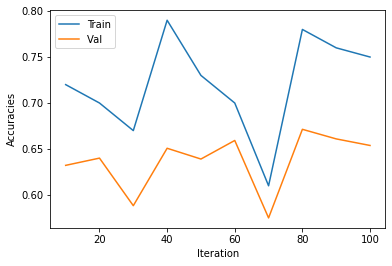

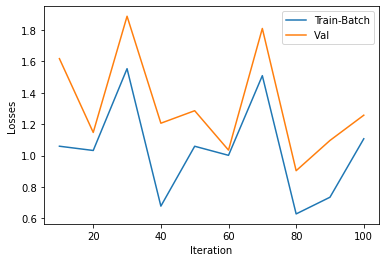

In [81]:
w0 = np.zeros(90)
b0 = 0

# Large mu
w, b = run_gradient_descent(w0, b0, mu=3, batch_size=100, max_iters=100)

Iter 10
Train [Acc=56%, Loss=0.692921, Th=0.475000]
Val   [Acc=56%, Loss=0.693016, Th=0.000000]
Iter 20
Train [Acc=59%, Loss=0.692754, Th=0.451250]
Val   [Acc=56%, Loss=0.692859, Th=0.000000]
Iter 30
Train [Acc=54%, Loss=0.692781, Th=0.428687]
Val   [Acc=56%, Loss=0.692712, Th=0.000000]
Iter 40
Train [Acc=58%, Loss=0.692966, Th=0.407253]
Val   [Acc=56%, Loss=0.692574, Th=0.000000]
Iter 50
Train [Acc=57%, Loss=0.691742, Th=0.386890]
Val   [Acc=56%, Loss=0.692405, Th=0.000000]
Iter 60
Train [Acc=62%, Loss=0.691951, Th=0.367546]
Val   [Acc=56%, Loss=0.692240, Th=0.000000]
Iter 70
Train [Acc=58%, Loss=0.691790, Th=0.349169]
Val   [Acc=56%, Loss=0.692084, Th=0.000000]
Iter 80
Train [Acc=62%, Loss=0.691596, Th=0.331710]
Val   [Acc=56%, Loss=0.691903, Th=0.000000]
Iter 90
Train [Acc=64%, Loss=0.691495, Th=0.315125]
Val   [Acc=56%, Loss=0.691773, Th=0.000000]
Iter 100
Train [Acc=53%, Loss=0.692604, Th=0.325684]
Val   [Acc=56%, Loss=0.691653, Th=0.000000]


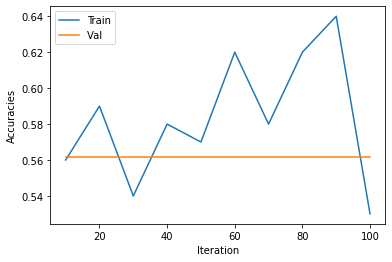

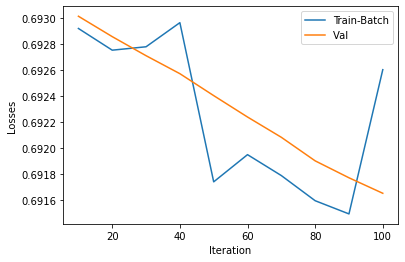

In [82]:
w0 = np.zeros(90)
b0 = 0

# Tiny mu
w, b = run_gradient_descent(w0, b0, mu=0.0002, batch_size=100, max_iters=100)

Iter 10
Train [Acc=69%, Loss=0.651638, Th=0.498684]
Val   [Acc=67%, Loss=0.655684, Th=0.473684]
Iter 20
Train [Acc=70%, Loss=0.622767, Th=0.497434]
Val   [Acc=68%, Loss=0.636010, Th=0.473684]
Iter 30
Train [Acc=75%, Loss=0.599374, Th=0.498878]
Val   [Acc=69%, Loss=0.622840, Th=0.526316]
Iter 40
Train [Acc=74%, Loss=0.605830, Th=0.500250]
Val   [Acc=70%, Loss=0.614288, Th=0.526316]
Iter 50
Train [Acc=73%, Loss=0.587393, Th=0.498922]
Val   [Acc=70%, Loss=0.608182, Th=0.526316]
Iter 60
Train [Acc=71%, Loss=0.593942, Th=0.500292]
Val   [Acc=71%, Loss=0.602052, Th=0.526316]
Iter 70
Train [Acc=69%, Loss=0.614769, Th=0.498961]
Val   [Acc=71%, Loss=0.597593, Th=0.526316]
Iter 80
Train [Acc=73%, Loss=0.576860, Th=0.500329]
Val   [Acc=71%, Loss=0.593872, Th=0.526316]
Iter 90
Train [Acc=70%, Loss=0.585307, Th=0.504260]
Val   [Acc=71%, Loss=0.591779, Th=0.526316]
Iter 100
Train [Acc=73%, Loss=0.573682, Th=0.502731]
Val   [Acc=71%, Loss=0.588363, Th=0.526316]


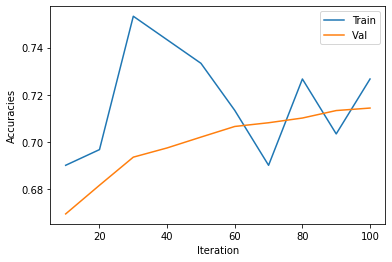

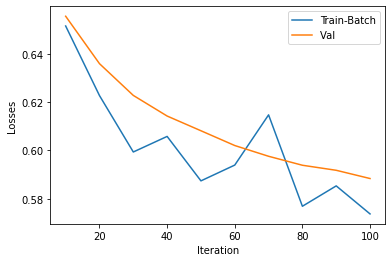

In [88]:
w0 = np.zeros(90)
b0 = 0

# Adequate mu
w, b = run_gradient_descent(w0, b0, mu=0.08, batch_size=300, max_iters=100)

**Explain and discuss your results here:**

As illustrated on the plots, we examined 3 cases:

Mu | Convergence | Learning | Explanation
--- | --- | --- | ---
Too small | V | X | The weights doesn't change enough to learn 
Too large | X | V | The weights change too much and are unstable
Adequate | V | V | A good balance between stability and learnability




### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

We chose mu according to the experimentation above. Batch size chosen to be larger to surpress the noisy learning. Larger amount of iteration to allow convergence to optimal values.

Iter 10
Train [Acc=66%, Loss=0.645557, Th=0.498684]
Val   [Acc=67%, Loss=0.654753, Th=0.473684]
Iter 20
Train [Acc=69%, Loss=0.642508, Th=0.497434]
Val   [Acc=69%, Loss=0.636306, Th=0.473684]
Iter 30
Train [Acc=72%, Loss=0.607709, Th=0.496247]
Val   [Acc=69%, Loss=0.624516, Th=0.526316]
Iter 40
Train [Acc=68%, Loss=0.621779, Th=0.495119]
Val   [Acc=70%, Loss=0.616263, Th=0.526316]
Iter 50
Train [Acc=71%, Loss=0.585922, Th=0.494047]
Val   [Acc=70%, Loss=0.608945, Th=0.526316]
Iter 60
Train [Acc=70%, Loss=0.603950, Th=0.495660]
Val   [Acc=71%, Loss=0.603125, Th=0.526316]
Iter 70
Train [Acc=73%, Loss=0.588878, Th=0.497193]
Val   [Acc=71%, Loss=0.598339, Th=0.526316]
Iter 80
Train [Acc=69%, Loss=0.601956, Th=0.496018]
Val   [Acc=71%, Loss=0.594735, Th=0.526316]
Iter 90
Train [Acc=74%, Loss=0.565073, Th=0.497533]
Val   [Acc=71%, Loss=0.592273, Th=0.526316]
Iter 100
Train [Acc=77%, Loss=0.580951, Th=0.498972]
Val   [Acc=71%, Loss=0.589407, Th=0.526316]
Iter 110
Train [Acc=75%, Loss=0.559273,

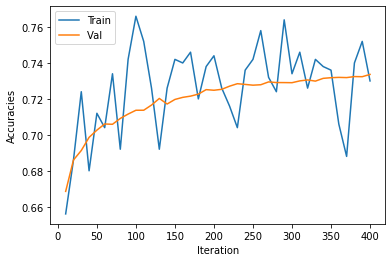

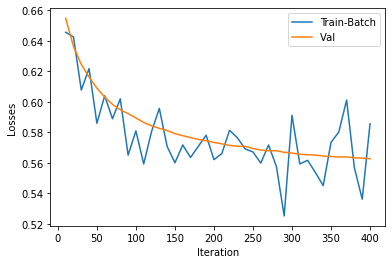

In [90]:
w0 = np.zeros(90)
b0 = 0

# Write your code here
w_opt, b_opt = run_gradient_descent(w0, b0, mu=0.08, batch_size=500, max_iters=400)
_, th_opt = accuracy(pred(w_opt, b_opt, train_norm_xs[:999, :]).flatten(), train_ts[:999, :].flatten())

**Explain and discuss your results here:**

Training metrics was indeed a bit less noisy, and validation metrics show a nice learning and convergence.

### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [85]:
# Write your code here

def compute_acc(X, t):
  global w_opt
  global b_opt
  global th_opt
  return accuracy(pred(w_opt, b_opt, X).flatten(), t.flatten(), th_opt)

train_acc = compute_acc(train_norm_xs, train_ts)
val_acc = compute_acc(val_norm_xs, val_ts)
test_acc = compute_acc(test_norm_xs, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7299638640126658  val_acc =  0.73044  test_acc =  0.7242494673639357


**Explain and discuss your results here:**

The metrics shows little variation between datasets, so the model wasn't overfit to the training data.


### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [86]:
from sklearn.linear_model import LogisticRegression

# model
clf = LogisticRegression(random_state=0).fit(train_norm_xs, train_ts.flatten())

In [87]:
train_acc = accuracy(clf.predict(train_norm_xs), train_ts.flatten(), th_opt)
val_acc = accuracy(clf.predict(val_norm_xs), val_ts.flatten(), th_opt)
test_acc = accuracy(clf.predict(test_norm_xs), test_ts.flatten(), th_opt)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

train_acc =  0.732772560820855  val_acc =  0.73314  test_acc =  0.726399380205307


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**


In [91]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [92]:
!jupyter nbconvert --to pdf Assignment1_Music_Century_Classification.ipynb

[NbConvertApp] Converting notebook Assignment1_Music_Century_Classification.ipynb to pdf
[NbConvertApp] Support files will be in Assignment1_Music_Century_Classification_files/
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Making directory ./Assignment1_Music_Century_Classification_files
[NbConvertApp] Writing 81939 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertAp